In [12]:
# Import LIBRARIES 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from fbprophet import Prophet
import seaborn as sns 


In [3]:
# Loading the data 
data = pd.read_csv('avocado.csv')

In [4]:
# View the data 
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# sort the data by date 
data_date = data.sort_values('Date')

In [6]:
# verify if the data has been sorted 
data_date.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


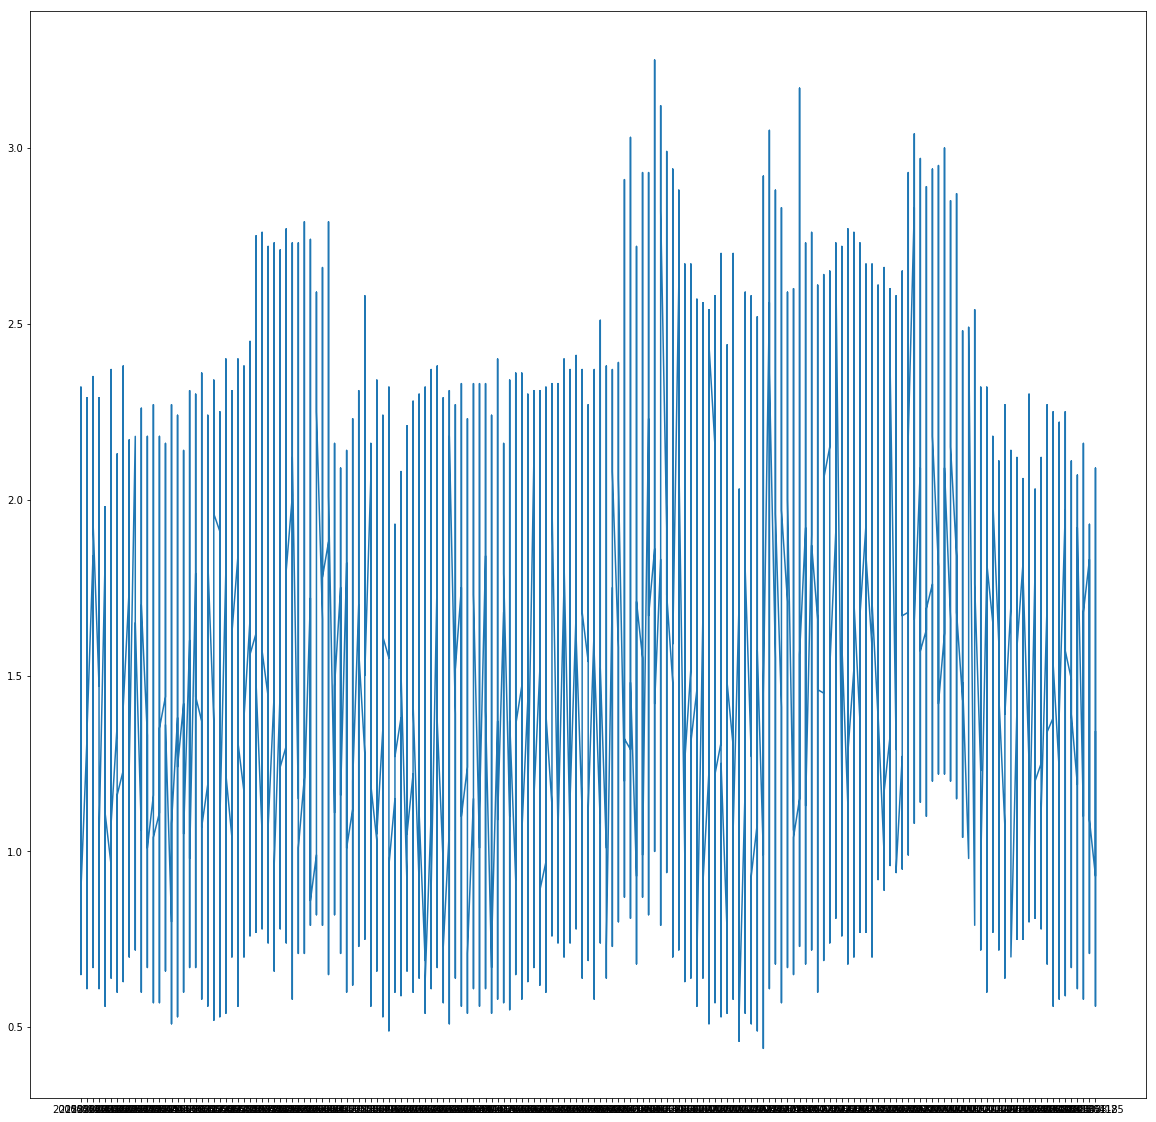

In [8]:
# plot 
plt.figure(figsize = (20, 20))
plt.plot(data_date['Date'], data_date['AveragePrice'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

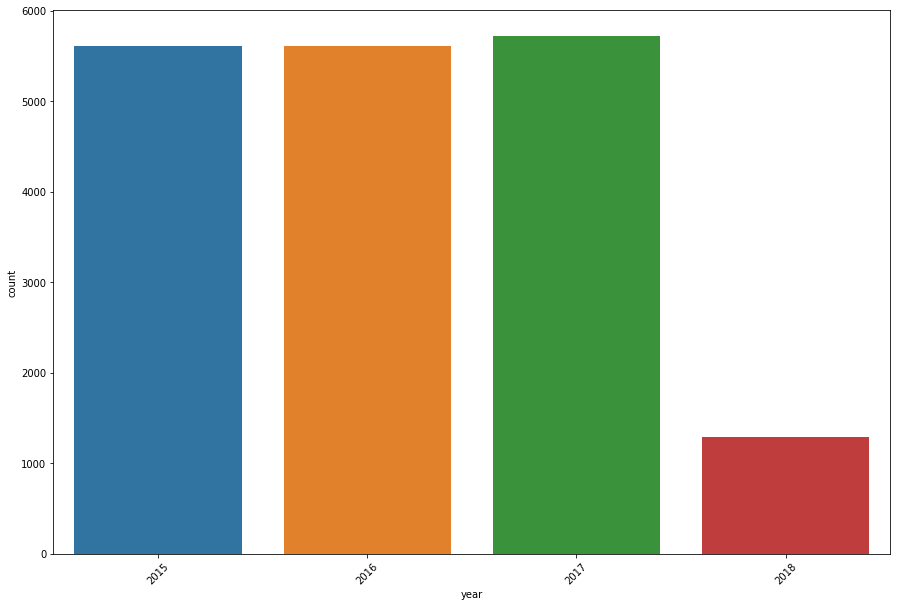

In [17]:
#plot
plt.figure(figsize = (15,10))
sns.countplot(x = 'year', data = data_date)
plt.xticks(rotation = 45)

In [9]:
# copy the columns in a different dataframe 
forecast_data = data_date[['Date', 'AveragePrice']]

In [18]:
# View
forecast_data.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [21]:
# Rename the columns in order to use fbprophet  
forecast_data = forecast_data.rename(columns = {'Date': 'ds', 'AveragePrice' : 'y'})

In [22]:
# predicting 
m = Prophet()
predict = m.fit(forecast_data)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Alekhya\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [23]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [50]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498604,0.879747,1.835044,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
1,2015-01-04,1.498604,0.881043,1.883402,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
2,2015-01-04,1.498604,0.917885,1.889051,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
3,2015-01-04,1.498604,0.885925,1.861888,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
4,2015-01-04,1.498604,0.885305,1.866156,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
5,2015-01-04,1.498604,0.879957,1.841942,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
6,2015-01-04,1.498604,0.878352,1.911734,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
7,2015-01-04,1.498604,0.933236,1.875678,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
8,2015-01-04,1.498604,0.891874,1.881701,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
9,2015-01-04,1.498604,0.889856,1.834291,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119


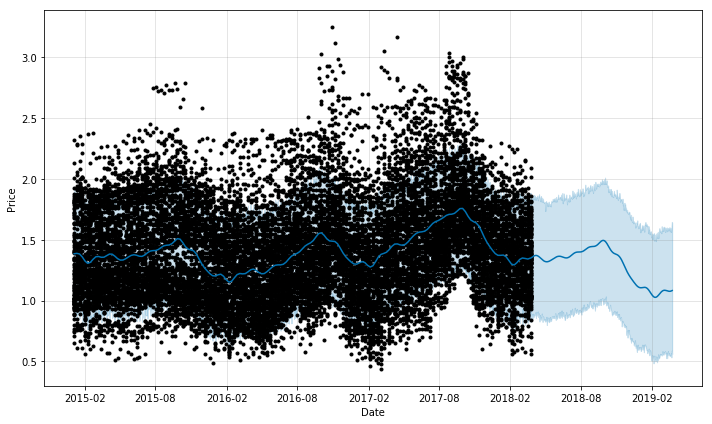

In [24]:
figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

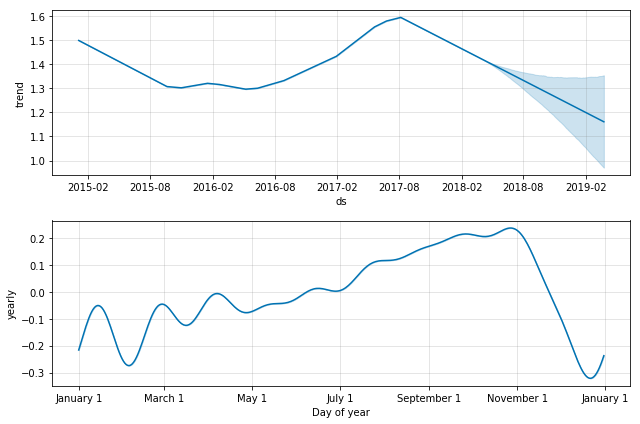

In [35]:
figure2 = m.plot_components(forecast)

In [25]:
# Lets pick a sepecific region and look at the predictions
data_region = data_date[data_date['region'] == 'Chicago']

In [26]:
data_region.shape

(338, 14)

In [27]:
# copy the columns into different dataframe 
data_region = data_region[['Date','AveragePrice']]

In [28]:
# change the names of the columns for  fbprophet 
data_region = data_region.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [29]:
# fit the model 
m = Prophet()
m.fit(data_region)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Alekhya\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [30]:
# make predictions
future = m.make_future_dataframe(periods = 365)
predict_region = m.predict(future)

In [31]:
predict_region

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.385664,0.876343,1.547836,1.385664,1.385664,-0.171641,-0.171641,-0.171641,-0.171641,-0.171641,-0.171641,0.0,0.0,0.0,1.214023
1,2015-01-04,1.385664,0.891616,1.565550,1.385664,1.385664,-0.171641,-0.171641,-0.171641,-0.171641,-0.171641,-0.171641,0.0,0.0,0.0,1.214023
2,2015-01-11,1.386873,0.973761,1.653202,1.386873,1.386873,-0.068862,-0.068862,-0.068862,-0.068862,-0.068862,-0.068862,0.0,0.0,0.0,1.318011
3,2015-01-11,1.386873,0.982022,1.662407,1.386873,1.386873,-0.068862,-0.068862,-0.068862,-0.068862,-0.068862,-0.068862,0.0,0.0,0.0,1.318011
4,2015-01-18,1.388082,0.985972,1.669396,1.388082,1.388082,-0.062029,-0.062029,-0.062029,-0.062029,-0.062029,-0.062029,0.0,0.0,0.0,1.326053
5,2015-01-18,1.388082,0.979204,1.668168,1.388082,1.388082,-0.062029,-0.062029,-0.062029,-0.062029,-0.062029,-0.062029,0.0,0.0,0.0,1.326053
6,2015-01-25,1.389291,0.848311,1.573263,1.389291,1.389291,-0.153417,-0.153417,-0.153417,-0.153417,-0.153417,-0.153417,0.0,0.0,0.0,1.235874
7,2015-01-25,1.389291,0.890523,1.582801,1.389291,1.389291,-0.153417,-0.153417,-0.153417,-0.153417,-0.153417,-0.153417,0.0,0.0,0.0,1.235874
8,2015-02-01,1.390500,0.789440,1.485433,1.390500,1.390500,-0.253207,-0.253207,-0.253207,-0.253207,-0.253207,-0.253207,0.0,0.0,0.0,1.137293
9,2015-02-01,1.390500,0.774948,1.478261,1.390500,1.390500,-0.253207,-0.253207,-0.253207,-0.253207,-0.253207,-0.253207,0.0,0.0,0.0,1.137293


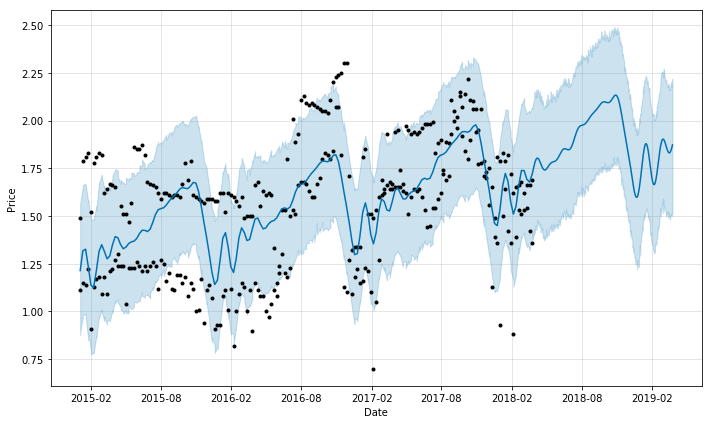

In [36]:
# plot 
figure3 = m.plot(predict_region, xlabel = 'Date', ylabel = 'Price')

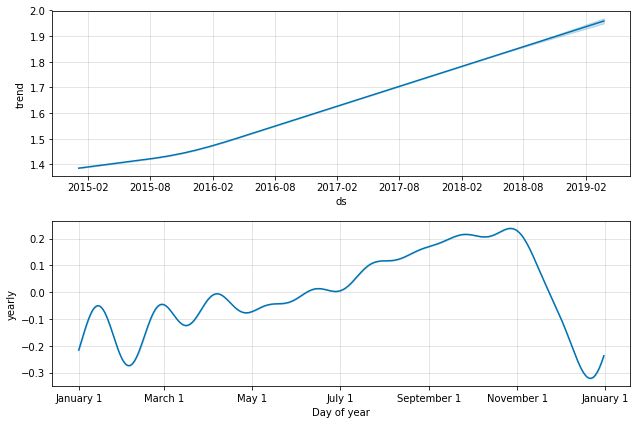

In [37]:
figure4 = m.plot_components(predict_region)